## Advanced Pandas, Basic Python Viz and Exercise

### Exercise
1. Use the same dataframes you generated or copied to this directory from the 03 Exercise:
    1. Extract of any SQL database 
    1. Imported file from your capstone work
    1. Any other data from other exercises you have aleady used
1. Import into Pandas
1. Generate at least three additional dataframes with analytics introduced in this notebook
    1. Melt
    1. Pivot
    1. Quantile
    1. Aggregations
1. Build at least three  visualizations supported by Pandas directly using prior analytics from the 03 Exercise or new analytics from this exercise

In [175]:
#!pip install openpyxl

## Get the data

### Read a CSV file from a website into a DataFrame

In [189]:
import pandas as pd
import numpy as np

#eia2022.csv was retrieved from the U.S. Energy Information Administration API using code in EIA_Electricity.ipynb
csv_path = 'eia2022.csv'

eia_data = pd.read_csv(csv_path, low_memory=False)
eia_data['value'] = pd.to_numeric(eia_data['value'], errors='coerce')


* Net generation:  The amount of gross generation less the electrical energy consumed at the generating station(s) for station service or auxiliaries. Note: Electricity required for pumping at pumped-storage plants is regarded as electricity for station service and is deducted from gross generation.
* Interchange (electric):  Energy transfers that cross Balancing Authority boundaries.
* Electricity demand:  The rate at which energy is delivered to loads and scheduling points by generation, transmission, and distribution facilities.

In [190]:
eia_data['datetime'] = pd.to_datetime(eia_data['period'], yearfirst=True, errors='coerce')

In [191]:
type(eia_data)

pandas.core.frame.DataFrame

In [192]:
eia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503256 entries, 0 to 2503255
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   period           object        
 1   respondent       object        
 2   respondent-name  object        
 3   type             object        
 4   type-name        object        
 5   value            float64       
 6   value-units      object        
 7   datetime         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 152.8+ MB


In [193]:
eia_data.head(1000)

,period,respondent,respondent-name,type,type-name,value,value-units,datetime
0,2023-01-01T00,JEA,JEA,TI,Total interchange,-300.0,megawatthours,2023-01-01 00:00:00
1,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",DF,Day-ahead demand forecast,2450.0,megawatthours,2023-01-01 00:00:00
2,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",TI,Total interchange,255.0,megawatthours,2023-01-01 00:00:00
3,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",D,Demand,2500.0,megawatthours,2023-01-01 00:00:00
4,2023-01-01T00,FMPP,Florida Municipal Power Pool,TI,Total interchange,-42.0,megawatthours,2023-01-01 00:00:00
...,...,...,...,...,...,...,...,...
995,2022-12-31T21,CENT,Central,TI,Total interchange,-84.0,megawatthours,2022-12-31 21:00:00
996,2022-12-31T21,CAR,Carolinas,NG,Net generation,22255.0,megawatthours,2022-12-31 21:00:00
997,2022-12-31T21,IPCO,Idaho Power Company,TI,Total interchange,-872.0,megawatthours,2022-12-31 21:00:00
998,2022-12-31T21,WACM,Western Area Power Administration - Rocky Moun...,NG,Net generation,4269.0,megawatthours,2022-12-31 21:00:00


<Axes: xlabel='datetime'>

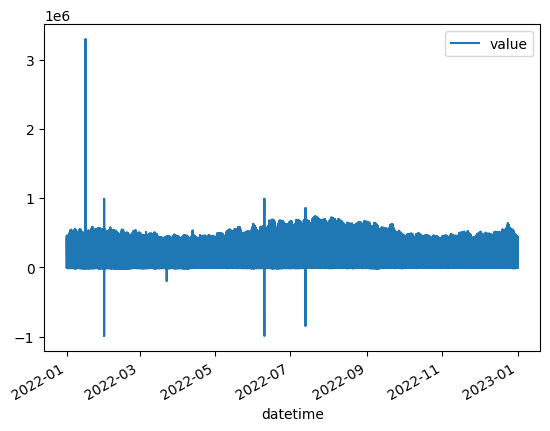

In [194]:
eia_data.plot.line(x='datetime', y = "value")

In [195]:
# SELECT [Age Group] , Year, COUNT(*) GROUP BY [Age Group], Year
# instead count unique combinations of type-name and respondent
eia_data[['type-name','respondent']].value_counts()

type-name                  respondent
Demand                     AZPS          8848
                           IID           8845
                           WAUW          8844
                           SCL           8843
                           GVL           8843
                                         ... 
Total interchange          PNM           8206
Net generation             GLHB          5802
Total interchange          GLHB          5717
Day-ahead demand forecast  SRP           4708
type-name                  respondent       1
Name: count, Length: 289, dtype: int64

In [196]:
#some blank values of type-name, looks like the same for type id
eia_data[['type','respondent']].value_counts()

type  respondent
D     AZPS          8848
      IID           8845
      WAUW          8844
      NYIS          8843
      SCL           8843
                    ... 
TI    PNM           8206
NG    GLHB          5802
TI    GLHB          5717
DF    SRP           4708
type  respondent       1
Name: count, Length: 289, dtype: int64

In [198]:
eia_data['respondent-name'].value_counts()
eia_data['respondent-name'].value_counts().to_csv('respondents.csv')


### Save and restore a DataFrame

In [199]:
eia_data.to_pickle('eia_data.pkl')

In [200]:
eia_data = pd.read_pickle('eia_data.pkl')

In [201]:
eia_data.head()

,period,respondent,respondent-name,type,type-name,value,value-units,datetime
0,2023-01-01T00,JEA,JEA,TI,Total interchange,-300.0,megawatthours,2023-01-01
1,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",DF,Day-ahead demand forecast,2450.0,megawatthours,2023-01-01
2,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",TI,Total interchange,255.0,megawatthours,2023-01-01
3,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",D,Demand,2500.0,megawatthours,2023-01-01
4,2023-01-01T00,FMPP,Florida Municipal Power Pool,TI,Total interchange,-42.0,megawatthours,2023-01-01


## Examine and clean the data

In [202]:
print("Index:  ", eia_data.index)
print("Columns:", eia_data.columns)
print("Size:   ", eia_data.size)
print("Shape:  ", eia_data.shape)

Index:   RangeIndex(start=0, stop=2503256, step=1)
Columns: Index(['period', 'respondent', 'respondent-name', 'type', 'type-name', 'value',
       'value-units', 'datetime'],
      dtype='object')
Size:    20026048
Shape:   (2503256, 8)


### Use the columns attribute to replace spaces with nothing


In [203]:
#changed - to _ instead
eia_data.columns = eia_data.columns.str.replace('-', '_')
eia_data.columns

Index(['period', 'respondent', 'respondent_name', 'type', 'type_name', 'value',
       'value_units', 'datetime'],
      dtype='object')

In [204]:
eia_data.head()

,period,respondent,respondent_name,type,type_name,value,value_units,datetime
0,2023-01-01T00,JEA,JEA,TI,Total interchange,-300.0,megawatthours,2023-01-01
1,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",DF,Day-ahead demand forecast,2450.0,megawatthours,2023-01-01
2,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",TI,Total interchange,255.0,megawatthours,2023-01-01
3,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",D,Demand,2500.0,megawatthours,2023-01-01
4,2023-01-01T00,FMPP,Florida Municipal Power Pool,TI,Total interchange,-42.0,megawatthours,2023-01-01


In [205]:
eia_data.describe().T

,count,mean,min,25%,50%,75%,max,std
value,2501916.0,14754.563427,-989940.0,230.0,1634.0,10920.0,3297048.0,51572.679781
datetime,2503255,2022-07-02 09:08:07.700692224,2022-01-01 00:00:00,2022-04-02 14:00:00,2022-07-02 11:00:00,2022-10-01 13:00:00,2023-01-01 00:00:00,NaN


In [206]:
eia_data.describe(include=["O"]).T

,count,unique,top,freq
period,2503256,8739,2022-01-01T00,288
respondent,2503256,78,DOPD,35007
respondent_name,2503256,78,PUD No. 1 of Douglas County,35007
type,2503256,5,NG,667063
type_name,2503256,5,Net generation,667063
value_units,2503256,2,megawatthours,2503255


In [207]:
print(len(eia_data.datetime.value_counts())) #count of unique values; not much use in this case
print(365*24)

8738
8760


<Axes: >

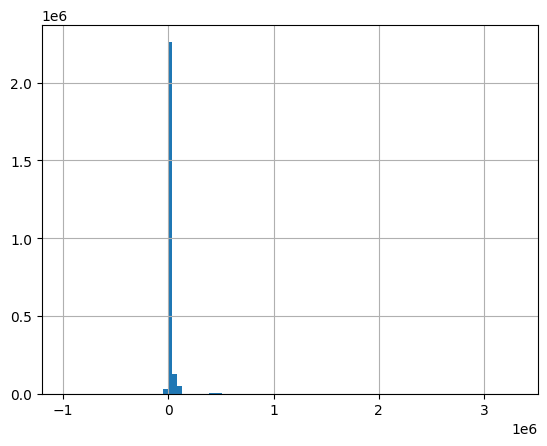

In [208]:
eia_data.value.hist(bins=100)

<Axes: >

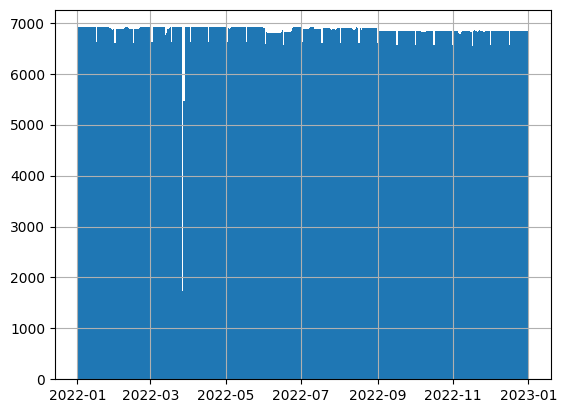

In [209]:
eia_data.datetime.hist(bins=366)

In [210]:
import numpy as np

#mortality_data['death_log']= np.log10(mortality_data['DeathRate'])

In [ ]:
#mortality_data.death_log.hist(bins=50)

In [ ]:
#mortality_data.DeathRate.hist(bins=50)

In [ ]:
#mortality_data.describe(include='O')

In [ ]:
#mortality_data.describe().T

## Access the data

<Axes: >

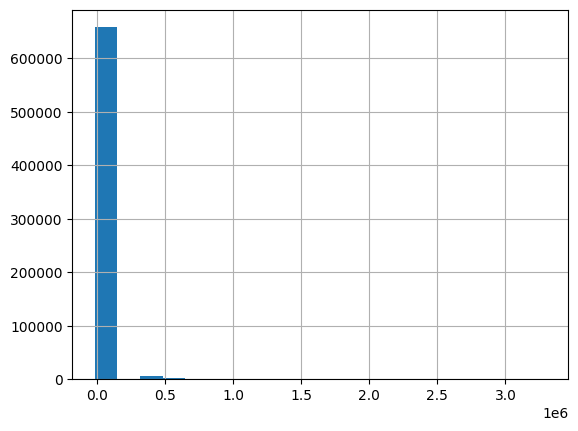

In [211]:
eia_data.query("type == 'NG'").value.hist(bins=20)

<Axes: >

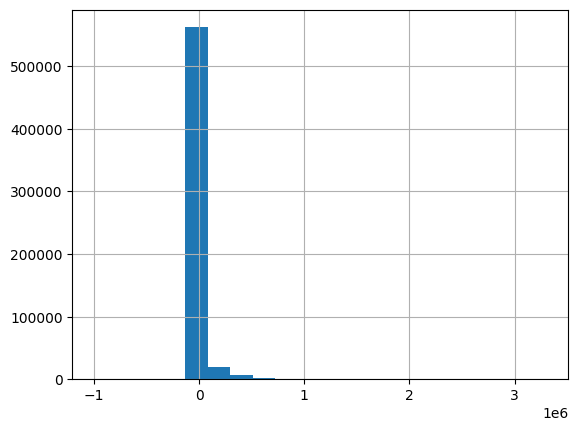

In [212]:
eia_data.query("type == 'D'").value.hist(bins=20)

In [213]:
eia_data.query('20220401 < datetime < 20220402').head()

,period,respondent,respondent_name,type,type_name,value,value_units,datetime
1881740,2022-04-01T23,NE,New England,D,Demand,13002.0,megawatthours,2022-04-01 23:00:00
1881741,2022-04-01T23,TEN,Tennessee,TI,Total interchange,-1126.0,megawatthours,2022-04-01 23:00:00
1881742,2022-04-01T23,NY,New York,DF,Day-ahead demand forecast,17029.0,megawatthours,2022-04-01 23:00:00
1881743,2022-04-01T23,TEX,Texas,D,Demand,44322.0,megawatthours,2022-04-01 23:00:00
1881744,2022-04-01T23,NE,New England,TI,Total interchange,-1369.0,megawatthours,2022-04-01 23:00:00


In [214]:
eia_data.query('respondent == "CISO"').head()

,period,respondent,respondent_name,type,type_name,value,value_units,datetime
32,2023-01-01T00,CISO,California Independent System Operator,D,Demand,24007.0,megawatthours,2023-01-01 00:00:00
72,2023-01-01T00,CISO,California Independent System Operator,TI,Total interchange,-6110.0,megawatthours,2023-01-01 00:00:00
92,2023-01-01T00,CISO,California Independent System Operator,DF,Day-ahead demand forecast,23703.0,megawatthours,2023-01-01 00:00:00
264,2023-01-01T00,CISO,California Independent System Operator,NG,Net generation,18024.0,megawatthours,2023-01-01 00:00:00
318,2022-12-31T23,CISO,California Independent System Operator,D,Demand,24051.0,megawatthours,2022-12-31 23:00:00


In [ ]:
# use backticks if a column name contains spaces
#mortality_data.query('Year == 2000 and `AgeGroup` != "1-4 Years"')

### Access a subset of rows and columns

In [215]:
eia_data.query('respondent_name == "Bonneville Power Administration"').value.head()

26     6997.0
100    7257.0
139    9792.0
283    7509.0
351    6951.0
Name: value, dtype: float64

In [216]:
eia_data.query('respondent_name == "Bonneville Power Administration"')[['type', 'value']].head()

,type,value
26,D,6997.0
100,DF,7257.0
139,NG,9792.0
283,TI,7509.0
351,D,6951.0


In [217]:
eia_data.query('20220401 <= datetime < 20220501 and respondent_name == "Bonneville Power Administration"') \
    [['datetime','value']].head()

,datetime,value
1681304,2022-04-30 23:00:00,5817.0
1681429,2022-04-30 23:00:00,5668.0
1681432,2022-04-30 23:00:00,2862.0
1681516,2022-04-30 23:00:00,5678.0
1681616,2022-04-30 22:00:00,5710.0


In [257]:
bpat_data = eia_data.query('respondent == "BPAT"')[['datetime','type','type_name','value']]
bpat_netgen = bpat_data.query('type == "NG"')
bpat_netgen.head()

,datetime,type,type_name,value
139,2023-01-01 00:00:00,NG,Net generation,9792.0
566,2022-12-31 23:00:00,NG,Net generation,9813.0
728,2022-12-31 22:00:00,NG,Net generation,10131.0
1134,2022-12-31 21:00:00,NG,Net generation,10355.0
1299,2022-12-31 20:00:00,NG,Net generation,10564.0


In [219]:
bpat_data.head()

,datetime,type,type_name,value
26,2023-01-01 00:00:00,D,Demand,6997.0
100,2023-01-01 00:00:00,DF,Day-ahead demand forecast,7257.0
139,2023-01-01 00:00:00,NG,Net generation,9792.0
283,2023-01-01 00:00:00,TI,Total interchange,7509.0
351,2022-12-31 23:00:00,D,Demand,6951.0


### Apply statistical methods

<Axes: >

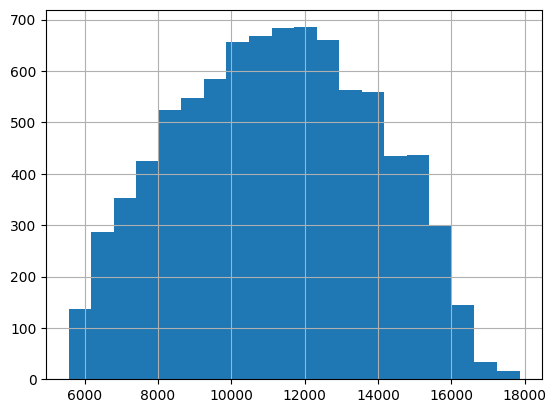

In [220]:
bpat_netgen.value.hist(bins=20)

In [221]:
#mean = sum of values / number of values
bpng_mu = bpat_netgen['value'].mean()
print(bpng_mu)

11216.500229990801


In [222]:
#standard deviation = sqrt of variance = sqrt(sum(square of mean-value for each data point)/(n-1))
#note: denominator is N (vs n-1) if standard dev and variance are calculated from entire population
bpng_sigma = bpat_netgen['value'].std()
print(bpng_sigma)

2661.423566115476


In [223]:
#95% confidence interval is mean +/- 2 stdev (or 1.96 stdev)
#We have the whole population of net generation from 2022 so we don't have to infer anything from a sample
#Unless we treat 2022 data as a sample from which to infer values for another time frame, i.e. the future
#Not a representative sample though if the system changes (new generation sources, old ones decommision, demand changes,)
print ("BPAT's hourly net generation was {} +/- {}".format(bpng_mu,1.96*bpng_sigma))
print(f"BPAT's hourly net generation was {bpng_mu} +/- {1.96*bpng_sigma} 95% of the time")

BPAT's hourly net generation was 11216.500229990801 +/- 5216.390189586334
BPAT's hourly net generation was 11216.500229990801 +/- 5216.390189586334 95% of the time


In [224]:
bpat_netgen = pd.DataFrame(bpat_netgen)
bpat_netgen['outlier'] = bpat_netgen['value'].apply(
        lambda x: 
        True 
        if ( x > bpng_mu + 1.96*bpng_sigma or x < bpng_mu - 1.96*bpng_sigma)  
        else False 
            )


In [225]:
bpat_netgen.outlier.value_counts()

outlier
False    8540
True      156
Name: count, dtype: int64

In [226]:
# line you draw for equal number of cases on either side
bpat_netgen.value.median()

11249.0

In [227]:
bpat_netgen['value'].max()

17858.0

In [228]:
bpat_netgen.count()

datetime     8696
type         8696
type_name    8696
value        8696
outlier      8696
dtype: int64

In [229]:
[i/20 for i in range(0,20)]

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

In [230]:
bpat_netgen.value.quantile(0.5)

11249.0

In [231]:
len(bpat_netgen)

8696

In [232]:
bpng_dist = bpat_netgen.value.quantile([i/20 for i in range(0,20)])
bpng_dist

0.00     5566.00
0.05     6812.75
0.10     7557.00
0.15     8165.75
0.20     8659.00
0.25     9131.00
0.30     9610.50
0.35    10066.00
0.40    10448.00
0.45    10864.00
0.50    11249.00
0.55    11646.00
0.60    12032.00
0.65    12418.75
0.70    12832.50
0.75    13263.25
0.80    13738.00
0.85    14232.00
0.90    14865.00
0.95    15499.25
Name: value, dtype: float64

In [233]:
bpng_dist.info()

<class 'pandas.core.series.Series'>
Index: 20 entries, 0.0 to 0.95
Series name: value
Non-Null Count  Dtype  
--------------  -----  
20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [234]:
#bins of 20 percentile cuts

#bpng_dist["quantile"] = bpng_dist.index
#bpng_dist


<Axes: >

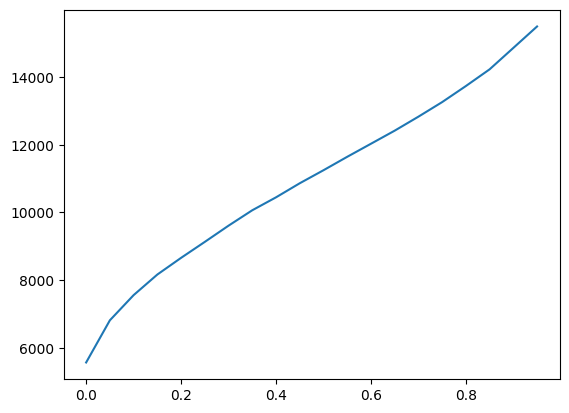

In [235]:
bpng_dist.plot.line(y="quantile", x = "value")

In [236]:
# compare with SUM() OVER in SQL
bpat_netgen["CumValue"] = bpat_netgen.value.cumsum()
bpat_netgen

,datetime,type,type_name,value,outlier,CumValue
139,2023-01-01 00:00:00,NG,Net generation,9792.0,False,9792.0
566,2022-12-31 23:00:00,NG,Net generation,9813.0,False,19605.0
728,2022-12-31 22:00:00,NG,Net generation,10131.0,False,29736.0
1134,2022-12-31 21:00:00,NG,Net generation,10355.0,False,40091.0
1299,2022-12-31 20:00:00,NG,Net generation,10564.0,False,50655.0
...,...,...,...,...,...,...
2501941,2022-01-01 04:00:00,NG,Net generation,14665.0,False,97480296.0
2502227,2022-01-01 03:00:00,NG,Net generation,15047.0,False,97495343.0
2502529,2022-01-01 02:00:00,NG,Net generation,14903.0,False,97510246.0
2502790,2022-01-01 01:00:00,NG,Net generation,14482.0,False,97524728.0


<Axes: >

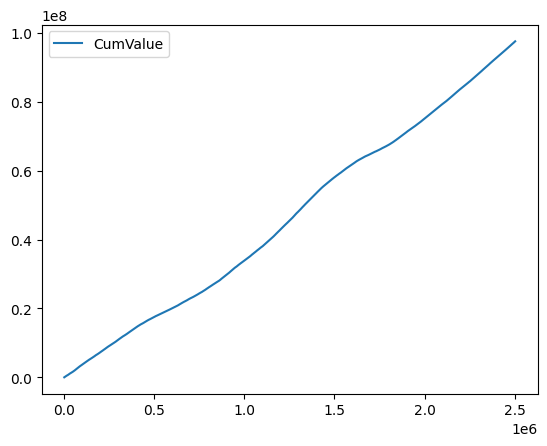

In [237]:
bpat_netgen.plot.line( y = "CumValue")

### Use Python for column arithmetic

In [259]:
bpat_data = pd.DataFrame(bpat_data)
bpat_mu_dict = {'NG':bpat_data.query('type == "NG"')['value'].mean(),
                'D':bpat_data.query('type == "D"')['value'].mean(),
                'TI':bpat_data.query('type == "TI"')['value'].mean(),
                'DF':bpat_data.query('type == "DF"')['value'].mean()}
bpat_data['type_mean'] = bpat_data['type'].apply(lambda t: bpat_mu_dict.get(t))
bpat_data['MeanCentered'] = bpat_data.value - bpat_data.type_mean
bpat_data.head()


,datetime,type,type_name,value,type_mean,MeanCentered
26,2023-01-01 00:00:00,D,Demand,6997.0,6663.427834,333.572166
100,2023-01-01 00:00:00,DF,Day-ahead demand forecast,7257.0,6690.771609,566.228391
139,2023-01-01 00:00:00,NG,Net generation,9792.0,11217.600945,-1425.600945
283,2023-01-01 00:00:00,TI,Total interchange,7509.0,8313.940023,-804.940023
351,2022-12-31 23:00:00,D,Demand,6951.0,6663.427834,287.572166


In [239]:
bpat_data.MeanCentered.describe()

count    3.493700e+04
mean    -9.330020e-14
std      1.883980e+03
min     -8.329616e+03
25%     -1.046180e+03
50%     -9.218046e+01
75%      1.122384e+03
max      6.641500e+03
Name: MeanCentered, dtype: float64

## Shape the data

### Set and use an index

In [240]:
bpat_data = bpat_data.set_index('datetime')
bpat_data.head()

,type,type_name,value,type_mean,MeanCentered
datetime,,,,,
2023-01-01 00:00:00,D,Demand,6997.0,6670.589654,326.410346
2023-01-01 00:00:00,DF,Day-ahead demand forecast,7257.0,6694.180459,562.819541
2023-01-01 00:00:00,NG,Net generation,9792.0,11216.500230,-1424.500230
2023-01-01 00:00:00,TI,Total interchange,7509.0,8313.616123,-804.616123
2022-12-31 23:00:00,D,Demand,6951.0,6670.589654,280.410346


In [241]:
len(bpat_data)

34937

In [242]:
bpat_data.reset_index(inplace=True)
bpat_data

,datetime,type,type_name,value,type_mean,MeanCentered
0,2023-01-01 00:00:00,D,Demand,6997.0,6670.589654,326.410346
1,2023-01-01 00:00:00,DF,Day-ahead demand forecast,7257.0,6694.180459,562.819541
2,2023-01-01 00:00:00,NG,Net generation,9792.0,11216.500230,-1424.500230
3,2023-01-01 00:00:00,TI,Total interchange,7509.0,8313.616123,-804.616123
4,2022-12-31 23:00:00,D,Demand,6951.0,6670.589654,280.410346
...,...,...,...,...,...,...
34932,2022-01-01 01:00:00,D,Demand,8977.0,6670.589654,2306.410346
34933,2022-01-01 00:00:00,D,Demand,8535.0,6670.589654,1864.410346
34934,2022-01-01 00:00:00,DF,Day-ahead demand forecast,8899.0,6694.180459,2204.819541
34935,2022-01-01 00:00:00,NG,Net generation,13958.0,11216.500230,2741.499770


In [250]:
# NOTE: the following line of code causes ValueError: Index has duplicate keys
bpat_data = bpat_data.set_index('datetime', verify_integrity=True)
#mortality_data

ValueError: Index has duplicate keys: DatetimeIndex(['2023-01-01 00:00:00', '2022-12-31 23:00:00',
               '2022-12-31 22:00:00', '2022-12-31 21:00:00',
               '2022-12-31 20:00:00', '2022-12-31 19:00:00',
               '2022-12-31 18:00:00', '2022-12-31 17:00:00',
               '2022-12-31 16:00:00', '2022-12-31 15:00:00',
               ...
               '2022-01-01 09:00:00', '2022-01-01 08:00:00',
               '2022-01-01 07:00:00', '2022-01-01 06:00:00',
               '2022-01-01 05:00:00', '2022-01-01 04:00:00',
               '2022-01-01 03:00:00', '2022-01-01 02:00:00',
               '2022-01-01 01:00:00', '2022-01-01 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=8737, freq=None)

In [251]:
bpat_mindex = bpat_data.set_index(
    ['datetime','type'], verify_integrity=True)
bpat_mindex.head()

ValueError: Index has duplicate keys: MultiIndex([('2022-12-31 07:00:00', 'NG'),
            ('2022-12-29 20:00:00',  'D'),
            ('2022-12-29 02:00:00',  'D'),
            ('2022-12-28 09:00:00', 'NG'),
            ('2022-12-28 09:00:00', 'DF'),
            ('2022-12-26 22:00:00', 'DF'),
            ('2022-12-26 04:00:00', 'NG'),
            ('2022-12-24 17:00:00', 'DF'),
            ('2022-12-24 17:00:00',  'D'),
            ('2022-12-23 06:00:00',  'D'),
            ...
            ('2022-01-08 12:00:00',  'D'),
            ('2022-01-07 01:00:00', 'DF'),
            ('2022-01-07 01:00:00',  'D'),
            ('2022-01-06 08:00:00',  'D'),
            ('2022-01-04 21:00:00', 'DF'),
            ('2022-01-04 21:00:00',  'D'),
            ('2022-01-04 04:00:00',  'D'),
            ('2022-01-02 17:00:00', 'DF'),
            ('2022-01-02 17:00:00',  'D'),
            ('2022-01-01 06:00:00',  'D')],
           names=['datetime', 'type'], length=228)

In [260]:
bpat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34709 entries, 26 to 2503183
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      34709 non-null  datetime64[ns]
 1   type          34709 non-null  object        
 2   type_name     34709 non-null  object        
 3   value         34709 non-null  float64       
 4   type_mean     34709 non-null  float64       
 5   MeanCentered  34709 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.9+ MB


In [261]:
bpat_data.head()

,datetime,type,type_name,value,type_mean,MeanCentered
26,2023-01-01 00:00:00,D,Demand,6997.0,6663.427834,333.572166
100,2023-01-01 00:00:00,DF,Day-ahead demand forecast,7257.0,6690.771609,566.228391
139,2023-01-01 00:00:00,NG,Net generation,9792.0,11217.600945,-1425.600945
283,2023-01-01 00:00:00,TI,Total interchange,7509.0,8313.940023,-804.940023
351,2022-12-31 23:00:00,D,Demand,6951.0,6663.427834,287.572166


In [252]:
#dt = pd.to_datetime('2023-01-01 00:00:00')
#print(dt)
bpat_data.query('datetime == "2022-12-29 20:00:00"')

,datetime,type,type_name,value
14836,2022-12-29 20:00:00,DF,Day-ahead demand forecast,7999.0
14959,2022-12-29 20:00:00,D,Demand,7901.0
15070,2022-12-29 20:00:00,D,Demand,7901.0


In [262]:
bpat_data = bpat_data.drop_duplicates()
bpat_mindex = bpat_data
bpat_mindex = bpat_mindex.set_index(
    ['datetime','type'], verify_integrity=True)
bpat_mindex.head()

type_name   value     type_mean   
datetime            type                                                    
2023-01-01 00:00:00 D                        Demand  6997.0   6663.427834  \
                    DF    Day-ahead demand forecast  7257.0   6690.771609   
                    NG               Net generation  9792.0  11217.600945   
                    TI            Total interchange  7509.0   8313.940023   
2022-12-31 23:00:00 D                        Demand  6951.0   6663.427834   

                          MeanCentered  
datetime            type                
2023-01-01 00:00:00 D       333.572166  
                    DF      566.228391  
                    NG    -1425.600945  
                    TI     -804.940023  
2022-12-31 23:00:00 D       287.572166

In [263]:
bpat_data.shape

(34709, 6)

In [264]:
bpat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34709 entries, 26 to 2503183
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      34709 non-null  datetime64[ns]
 1   type          34709 non-null  object        
 2   type_name     34709 non-null  object        
 3   value         34709 non-null  float64       
 4   type_mean     34709 non-null  float64       
 5   MeanCentered  34709 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.9+ MB


### Pivot the data

In [265]:
bpat_data.head()

,datetime,type,type_name,value,type_mean,MeanCentered
26,2023-01-01 00:00:00,D,Demand,6997.0,6663.427834,333.572166
100,2023-01-01 00:00:00,DF,Day-ahead demand forecast,7257.0,6690.771609,566.228391
139,2023-01-01 00:00:00,NG,Net generation,9792.0,11217.600945,-1425.600945
283,2023-01-01 00:00:00,TI,Total interchange,7509.0,8313.940023,-804.940023
351,2022-12-31 23:00:00,D,Demand,6951.0,6663.427834,287.572166


In [281]:
bpat_wide = bpat_data.pivot(
    index = 'datetime', columns='type_name', values=['value','MeanCentered'])
bpat_wide.head(5)
#multiple values for hour and type. Sum?

value                          
type_name           Day-ahead demand forecast  Demand Net generation   
datetime                                                               
2022-01-01 00:00:00                    8899.0  8535.0        13958.0  \
2022-01-01 01:00:00                    9290.0  8977.0        14482.0   
2022-01-01 02:00:00                    9555.0  9407.0        14903.0   
2022-01-01 03:00:00                    9388.0  9369.0        15047.0   
2022-01-01 04:00:00                    9072.0  9183.0        14665.0   

                                                   MeanCentered                
type_name           Total interchange Day-ahead demand forecast       Demand   
datetime                                                                       
2022-01-01 00:00:00            9579.0               2208.228391  1871.572166  \
2022-01-01 01:00:00           10302.0               2599.228391  2313.572166   
2022-01-01 02:00:00           10569.0               2864.228391  2743.572166   
2022-01-01 03:00:00           10734.0               2697.228391  2705.572166   
2022-01-01 04:00:00           10164.0               2381.228391  2519.572166   

                                                      
type_name           Net generation Total interchange  
datetime                                              
2022-01-01 00:00:00    2740.399055       1265.059977  
2022-01-01 01:00:00    3264.399055       1988.059977  
2022-01-01 02:00:00    3685.399055       2255.059977  
2022-01-01 03:00:00    3829.399055       2420.059977  
2022-01-01 04:00:00    3447.399055       1850.059977

In [282]:
bpat_wide.shape

(8738, 8)

In [268]:
#mortality_wide = mortality_data.pivot(
#    index=['Year','MeanCentered'], columns='AgeGroup', values='DeathRate')
#mortality_wide.head(3)    

In [269]:
#mortality_wide = mortality_data.pivot(
#    index='Year', columns='AgeGroup')
#mortality_wide.head(3)

In [283]:
bpat_wide.to_csv("bpat_wide.csv")

In [284]:
bpat_wide.shape

(8738, 8)

### Melt the data

In [272]:
#mortality_wide = mortality_data.pivot(
#    index='Year', columns='AgeGroup', values='DeathRate')
#mortality_wide.head(3)

In [285]:
# get starting data


# save to Excel format to remove indexes
bpat_wide.to_excel('bpat_wide.xlsx')
bpat_wide = pd.read_excel('bpat_wide.xlsx', header=1)

bpat_wide.head(4)

,type_name,Day-ahead demand forecast,Demand,Net generation,Total interchange,Day-ahead demand forecast.1,Demand.1,Net generation.1,Total interchange.1
0,datetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:00:00,8899.0,8535.0,13958.0,9579.0,2208.228391,1871.572166,2740.399055,1265.059977
2,2022-01-01 01:00:00,9290.0,8977.0,14482.0,10302.0,2599.228391,2313.572166,3264.399055,1988.059977
3,2022-01-01 02:00:00,9555.0,9407.0,14903.0,10569.0,2864.228391,2743.572166,3685.399055,2255.059977


In [286]:
bpat_wide.columns

Index(['type_name', 'Day-ahead demand forecast', 'Demand', 'Net generation',
       'Total interchange', 'Day-ahead demand forecast.1', 'Demand.1',
       'Net generation.1', 'Total interchange.1'],
      dtype='object')

In [291]:
bpat_long = bpat_wide.melt(
    id_vars = 'type_name',
    #value_vars=['Day-ahead demand forecast','Demand', 'Net generation', 'Total interchange'],
    #var_name ='type_name',
    value_name='MwattHours'
    )

with pd.option_context('display.max_rows', 10):
    display(bpat_long)

,type_name,variable,MwattHours
0,datetime,Day-ahead demand forecast,NaN
1,2022-01-01 00:00:00,Day-ahead demand forecast,8899.000000
2,2022-01-01 01:00:00,Day-ahead demand forecast,9290.000000
3,2022-01-01 02:00:00,Day-ahead demand forecast,9555.000000
4,2022-01-01 03:00:00,Day-ahead demand forecast,9388.000000
...,...,...,...
69907,2022-12-31 20:00:00,Total interchange.1,-800.940023
69908,2022-12-31 21:00:00,Total interchange.1,-956.940023
69909,2022-12-31 22:00:00,Total interchange.1,-773.940023
69910,2022-12-31 23:00:00,Total interchange.1,-891.940023


## Analyze the data

### Group the data

In [315]:
bpat_data = eia_data.query('respondent == "BPAT"')[['datetime','type','type_name','value']]
bpat_data = pd.DataFrame(bpat_data)
bpat_data = bpat_data.drop_duplicates()
bpat_data.head()

,datetime,type,type_name,value
26,2023-01-01 00:00:00,D,Demand,6997.0
100,2023-01-01 00:00:00,DF,Day-ahead demand forecast,7257.0
139,2023-01-01 00:00:00,NG,Net generation,9792.0
283,2023-01-01 00:00:00,TI,Total interchange,7509.0
351,2022-12-31 23:00:00,D,Demand,6951.0


In [307]:
bpat_data = bpat_data.drop('type_name', axis=1)
bpat_data.groupby('type').mean()

,datetime,value
type,,
D,2022-07-02 12:28:06.002753536,6663.427834
DF,2022-07-02 08:26:26.482758656,6690.771609
NG,2022-07-02 17:52:29.636803840,11217.600945
TI,2022-07-03 19:31:28.955916288,8313.940023


In [308]:
bpat_data.groupby('type').median()

,datetime,value
type,,
D,2022-07-02 15:30:00,6525.0
DF,2022-07-02 07:30:00,6539.0
NG,2022-07-02 23:00:00,11253.0
TI,2022-07-04 08:30:00,8351.0


In [311]:
bpat_data.groupby(['datetime','type']).count().head(20)

value
datetime            type       
2022-01-01 00:00:00 D         1
                    DF        1
                    NG        1
                    TI        1
2022-01-01 01:00:00 D         1
                    DF        1
                    NG        1
                    TI        1
2022-01-01 02:00:00 D         1
                    DF        1
                    NG        1
                    TI        1
2022-01-01 03:00:00 D         1
                    DF        1
                    NG        1
                    TI        1
2022-01-01 04:00:00 D         1
                    DF        1
                    NG        1
                    TI        1

### Aggregate the data

In [312]:
bpat_data[['datetime','value']].groupby('datetime').agg(['mean','median','min','max','std'])

value                                       
                         mean   median     min      max          std
datetime                                                            
2022-01-01 00:00:00  10242.75   9239.0  8535.0  13958.0  2514.340255
2022-01-01 01:00:00  10762.75   9796.0  8977.0  14482.0  2543.161205
2022-01-01 02:00:00  11108.50  10062.0  9407.0  14903.0  2581.843979
2022-01-01 03:00:00  11134.50  10061.0  9369.0  15047.0  2685.473825
2022-01-01 04:00:00  10771.00   9673.5  9072.0  14665.0  2641.970855
...                       ...      ...     ...      ...          ...
2022-12-31 20:00:00   8256.25   7559.0  7343.0  10564.0  1542.323221
2022-12-31 21:00:00   8074.75   7393.5  7157.0  10355.0  1524.540669
2022-12-31 22:00:00   7998.25   7409.5  7043.0  10131.0  1436.249601
2022-12-31 23:00:00   7844.00   7306.0  6951.0   9813.0  1326.676298
2023-01-01 00:00:00   7888.75   7383.0  6997.0   9792.0  1285.936332

[8738 rows x 5 columns]

In [316]:
bpat_data.head()

,datetime,type,type_name,value
26,2023-01-01 00:00:00,D,Demand,6997.0
100,2023-01-01 00:00:00,DF,Day-ahead demand forecast,7257.0
139,2023-01-01 00:00:00,NG,Net generation,9792.0
283,2023-01-01 00:00:00,TI,Total interchange,7509.0
351,2022-12-31 23:00:00,D,Demand,6951.0


In [313]:
bpat_data[['datetime','value']].groupby('datetime')?

SyntaxError: invalid syntax (1491018599.py, line 1)

In [89]:
AgeGS = mortality_data.groupby("AgeGroup")
type(AgeGS)

pandas.core.groupby.generic.DataFrameGroupBy

In [91]:
AgeGS["outlier"].agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
1-4 Years,0.193277,False,0.396538,2
10-14 Years,0.000000,False,0.000000,1
15-19 Years,0.000000,False,0.000000,1
5-9 Years,0.000000,False,0.000000,1


In [92]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
1-4 Years,0.003832,0.001091,0.005005,117
10-14 Years,0.000938,0.000446,0.000884,115
15-19 Years,0.001774,0.001069,0.001384,117
5-9 Years,0.001173,0.000484,0.001275,115


In [93]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std','min','max','var','nunique']).head(3)

,mean,median,std,min,max,var,nunique
Year,,,,,,,
1900,0.008082,0.004755,0.007882,0.002983,0.019838,0.000062,4
1901,0.007127,0.004410,0.006597,0.002736,0.016950,0.000044,4
1902,0.006832,0.004124,0.006527,0.002525,0.016557,0.000043,4


In [94]:
def fun_1q(foo): return foo.quantile(0.75)

fun_1q(mortality_data.DeathRate)

0.0022257500000000003

In [95]:
fun_1q(mortality_wide[['1-4 Years']])

1-4 Years    0.005773
Name: 0.75, dtype: float64

## Visualize the data

In [317]:
bpat_data.pivot(index='datetime',columns='type_name')['value']

type_name,Day-ahead demand forecast,Demand,Net generation,Total interchange
datetime,,,,
2022-01-01 00:00:00,8899.0,8535.0,13958.0,9579.0
2022-01-01 01:00:00,9290.0,8977.0,14482.0,10302.0
2022-01-01 02:00:00,9555.0,9407.0,14903.0,10569.0
2022-01-01 03:00:00,9388.0,9369.0,15047.0,10734.0
2022-01-01 04:00:00,9072.0,9183.0,14665.0,10164.0
...,...,...,...,...
2022-12-31 20:00:00,7605.0,7343.0,10564.0,7513.0
2022-12-31 21:00:00,7430.0,7157.0,10355.0,7357.0
2022-12-31 22:00:00,7279.0,7043.0,10131.0,7540.0


<Axes: xlabel='typing.Literal[<no_default>]'>

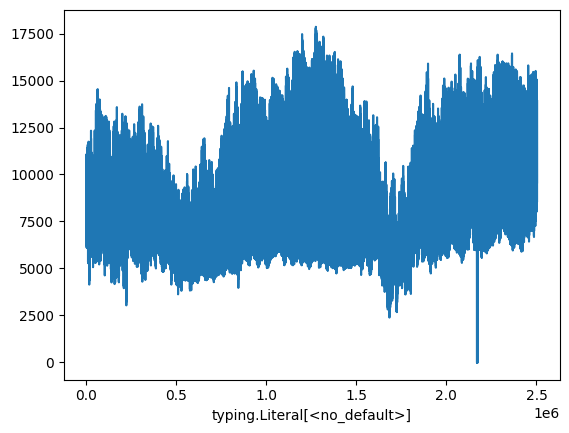

In [318]:
bpat_data['value'].plot()

<Axes: xlabel='datetime'>

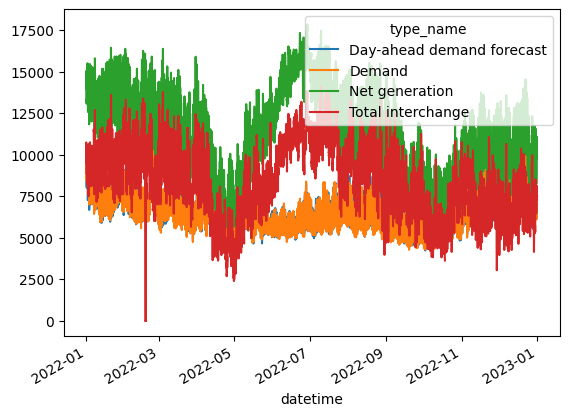

In [322]:
bpat_data.pivot(index='datetime',columns='type_name')['value'].plot()


In [323]:
bpat_data.groupby('type')['value'] \
    .agg(['mean','median','std'])


,mean,median,std
type,,,
D,6663.427834,6525.0,1058.655307
DF,6690.771609,6539.0,1057.333577
NG,11217.600945,11253.0,2660.874289
TI,8313.940023,8351.0,2222.434494


<Axes: ylabel='type'>

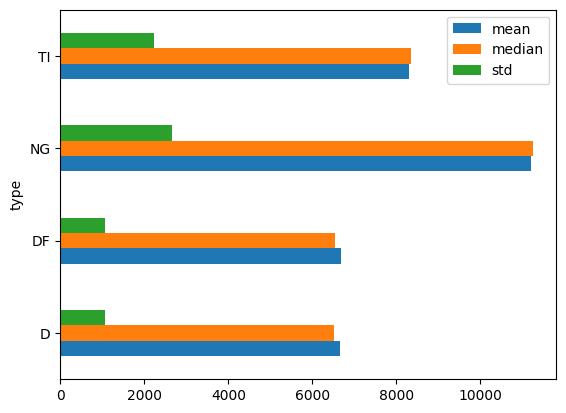

In [324]:
bpat_data.groupby('type')['value'] \
    .agg(['mean','median','std']).plot.barh()

In [ ]:
#!pip install seaborn

In [327]:
import seaborn as sb

[Text(0, 0.5, 'Megawatt Hours')]

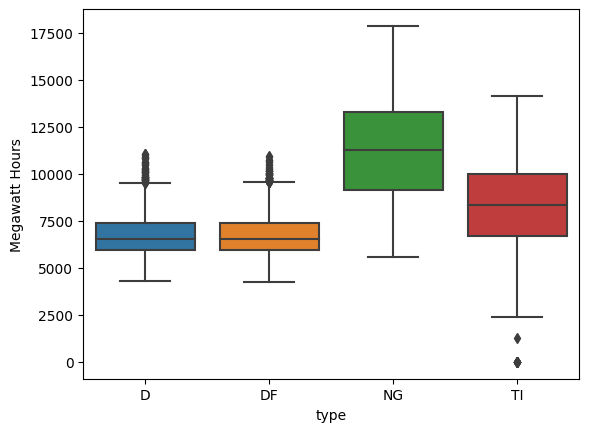

In [330]:
sb.boxplot(data=bpat_data, 
             y='value', x='type').set(ylabel='Megawatt Hours')

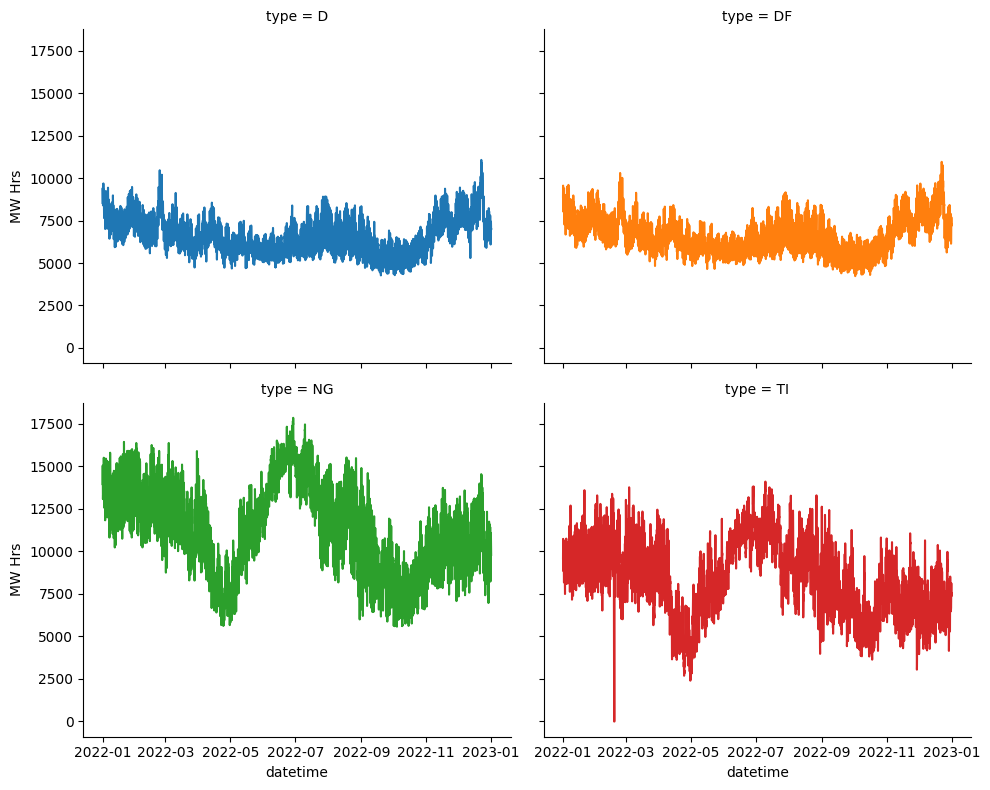

In [332]:
sb.relplot(data=bpat_data, 
            kind='line', x='datetime', y='value', hue='type', 
            height=4, aspect=1.25, 
            col='type', col_wrap=2, legend=False).set(ylabel='MW Hrs')